<a href="https://colab.research.google.com/github/emarevalog/Machine_learning_project/blob/main/Exploraci%C3%B3n_estad%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploración de datos

In [1]:
#Librerías
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from google.colab import drive

In [2]:
# Montar Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_excel('/content/drive/MyDrive/Datasets/Datos_monografía.xlsx', header = 0)

In [4]:
#Cambios en los nombres de las variables
df.columns = df.columns.str.title()
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("__", "_")
df.columns = df.columns.str.replace("Ndvi", "NDVI")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Mes                           96 non-null     int64  
 1   NDVI                          96 non-null     float64
 2   Precipitación                 96 non-null     float64
 3   Evapotranspiración            96 non-null     float64
 4   Intercepción                  96 non-null     float64
 5   Evapotranspiración_Potencial  96 non-null     float64
 6   Humedad_Del_Suelo             96 non-null     float64
 7   Recarga                       96 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 6.1 KB


In [6]:
df.describe()

,Mes,NDVI,Precipitación,Evapotranspiración,Intercepción,Evapotranspiración_Potencial,Humedad_Del_Suelo,Recarga
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,6.500000,0.718484,152.939872,107.602642,21.938173,148.237226,6775.581347,12.263074
std,3.470174,0.063083,72.459348,17.822530,10.622865,17.011936,1912.496048,19.240371
min,1.000000,0.507693,14.795760,55.873611,1.924262,69.065290,2524.892458,0.002570
25%,3.750000,0.680992,107.752661,99.362773,15.799435,139.663264,5277.845832,0.679930
50%,6.500000,0.742779,142.835718,110.129264,24.107704,147.714306,6629.215171,3.914425
75%,9.250000,0.766414,211.338201,120.669349,30.882808,158.720574,8519.760712,17.937855
max,12.000000,0.798472,364.757331,142.040391,36.480872,185.793053,9919.101253,116.139752


In [7]:
print(df.columns)

Index(['Mes', 'NDVI', 'Precipitación', 'Evapotranspiración', 'Intercepción',
       'Evapotranspiración_Potencial', 'Humedad_Del_Suelo', 'Recarga'],
      dtype='object')


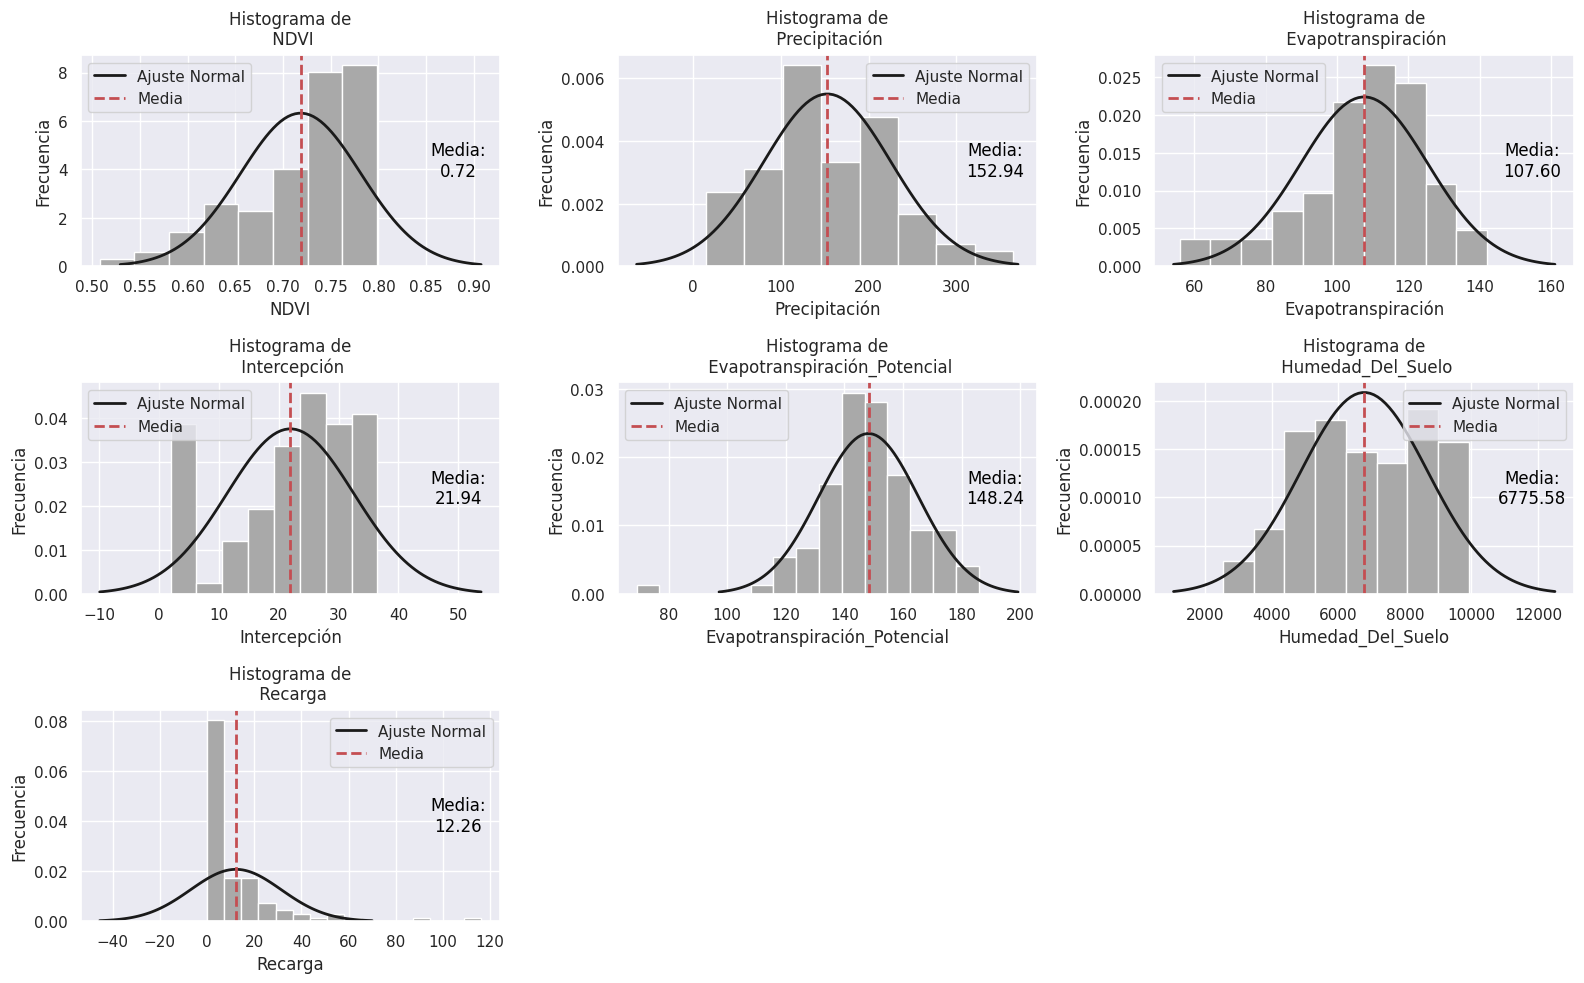

In [9]:
# Histogramas
# Lista de variables
variables = ['NDVI', 'Precipitación', 'Evapotranspiración', 'Intercepción',
     'Evapotranspiración_Potencial', 'Humedad_Del_Suelo', 'Recarga']

sns.set(style="darkgrid")
fig, axes = plt.subplots(3, 3, figsize=(16, 10))
bar_color = 'darkgray'

for i, variable in enumerate(variables):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Calcular la media y la desviación estándar de la variable
    mu, std = df[variable].mean(), df[variable].std()

    # Crear un rango de valores para la curva de mejor ajuste
    x_values = np.linspace(mu - 3 * std, mu + 3 * std, 100)

    # Calcular la curva de densidad de probabilidad (PDF) utilizando una distribución normal
    pdf = norm.pdf(x_values, mu, std)

    # Trazar el histograma
    ax.hist(df[variable], bins="auto", density=True, cumulative=False, color=bar_color)

    # Trazar la curva de mejor ajuste
    ax.plot(x_values, pdf, 'k-', lw=2, label='Ajuste Normal')

    # Agregar la línea vertical para la media
    ax.axvline(mu, color='r', linestyle='dashed', linewidth=2, label='Media')

    # Agregar el valor de la media
    ax.text(0.9, 0.5, f'Media:\n{mu:.2f}', transform=ax.transAxes, ha='center', va='center', color='black')

    ax.set_title(f'Histograma de\n {variable}', y=1.01)
    ax.set_xlabel(variable)
    ax.set_ylabel('Frecuencia')
    ax.legend()

# Elimina cualquier eje no utilizado
for i in range(len(variables), 3*3):
    fig.delaxes(axes[i // 3, i % 3])

plt.tight_layout()
plt.show()

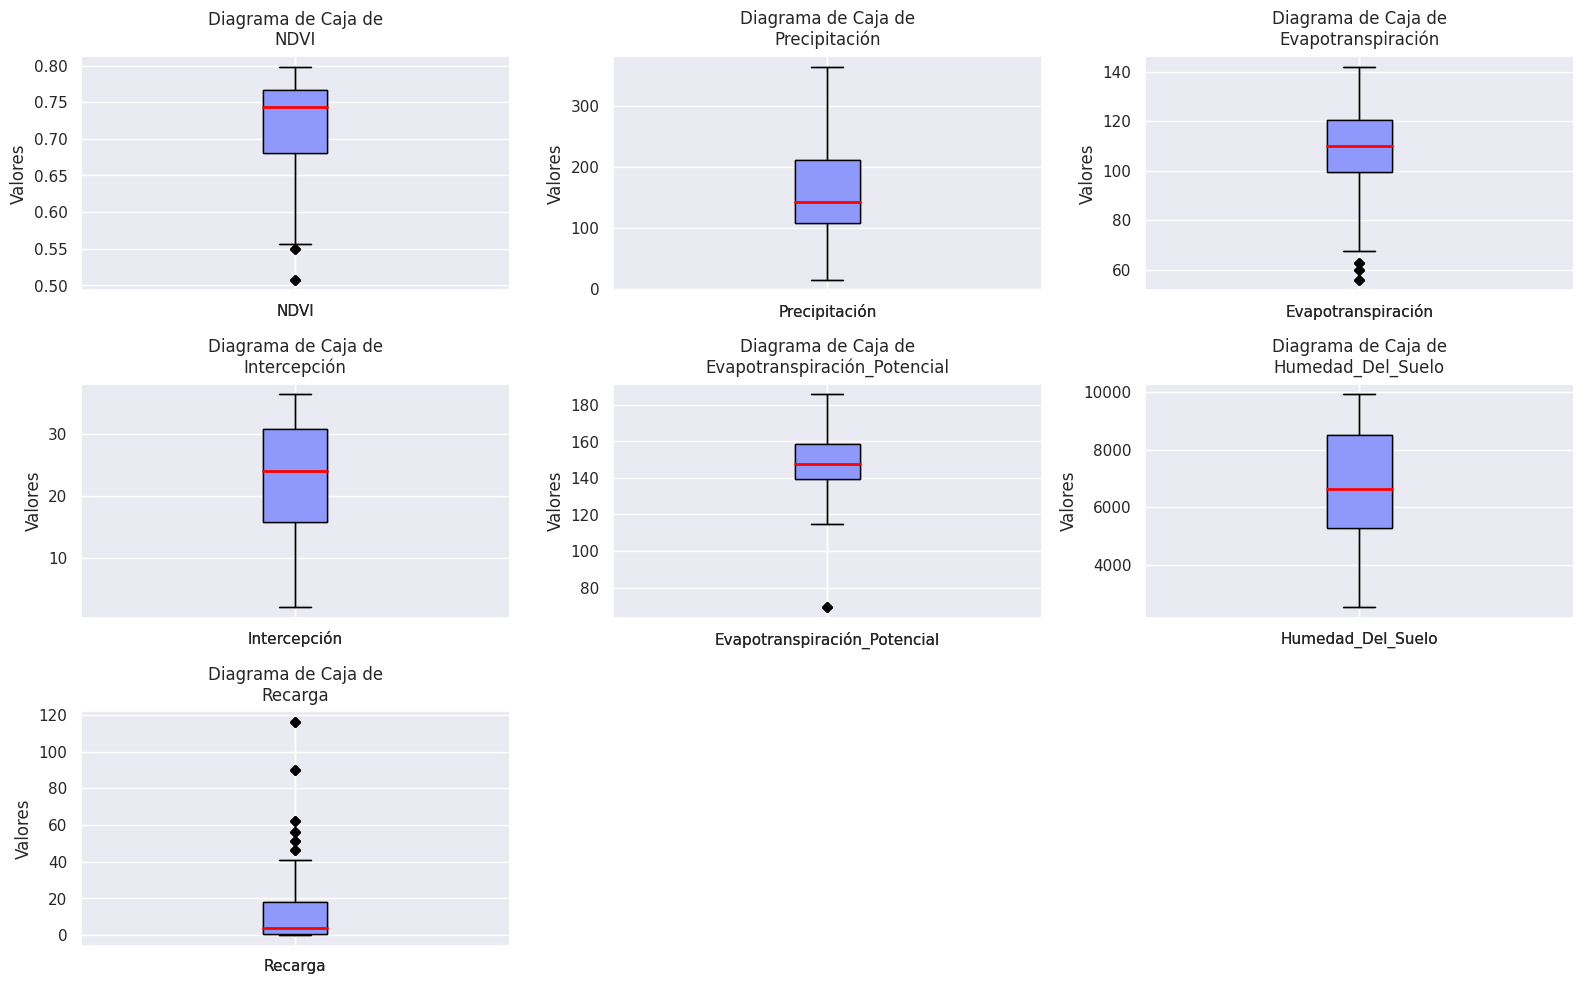

In [11]:
#Diagramas de cajas
sns.set_style("darkgrid")
fig, axes = plt.subplots(3, 3, figsize=(16, 10))

for i, variable in enumerate(variables):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Crear un diagrama de caja vertical para la variable
    boxprops = dict(facecolor='xkcd:periwinkle blue', color='black')
    flierprops = dict(marker='D', markerfacecolor='black', markersize=5)

    ax.boxplot(df[variable], vert=True, labels=[variable], patch_artist=True,
               boxprops=boxprops, flierprops=flierprops)

    medianprops = dict(linewidth=2, color='red')
    ax.boxplot(df[variable], vert=True, labels=[variable], patch_artist=True,
               boxprops=boxprops, flierprops=flierprops, medianprops=medianprops)

    ax.set_title(f'Diagrama de Caja de\n{variable}', y=1.01)
    ax.set_ylabel('Valores')

# Elimina cualquier eje no utilizado
for i in range(len(variables), 3*3):
    fig.delaxes(axes[i // 3, i % 3])

plt.tight_layout()
plt.show()

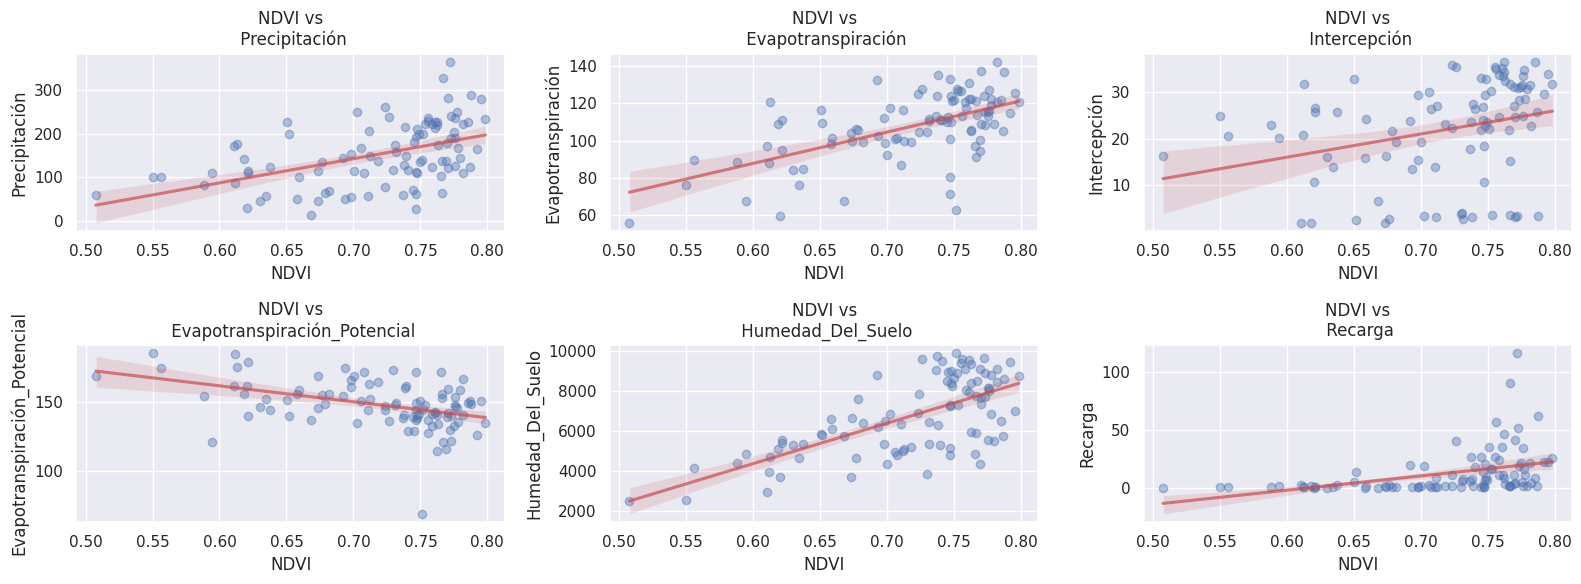

In [13]:
# Variables
x = 'NDVI'
y_variables = ['Precipitación', 'Evapotranspiración', 'Intercepción', 'Evapotranspiración_Potencial', 'Humedad_Del_Suelo', 'Recarga']

plt.figure(figsize=(16, 6))
palette = sns.color_palette('hsv', len(y_variables))

# Crea subtramas para los gráficos de dispersión
for i, (y, color) in enumerate(zip(y_variables, palette), 1):
    plt.subplot(2, 3, i)
    sns.regplot(x=x, y=y, data=df, scatter_kws={"alpha": 0.4}, line_kws={"color": "r", "alpha": 0.7})
    plt.title(f'{x} vs\n {y}')
    plt.xlabel(x)
    plt.ylabel(y)

plt.tight_layout()

plt.show()

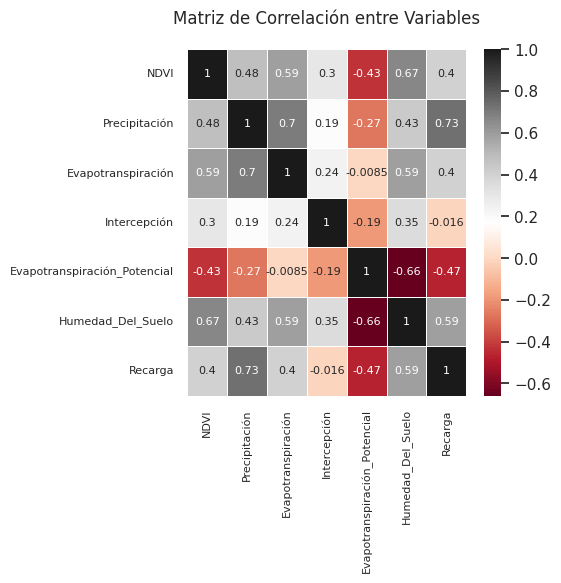

In [14]:
# Crea un subconjunto del DataFrame con las variables
df_numeric = df[variables]

# Calcula la matriz de correlación
matriz_correlacion = df_numeric.corr()

plt.figure(figsize=(4.5, 4.5))

# Crea un mapa de calor de la matriz de correlación
sns.heatmap(matriz_correlacion, annot=True, cmap='RdGy', linewidths=0.7,
            annot_kws={"size": 8})

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.title('Matriz de Correlación entre Variables',y=1.05)

plt.show()